<a href="https://colab.research.google.com/github/iris-obed/AI-Data-Engineer-Assignments/blob/master/Home_price_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem 1**:  Selecting features for practice

In [4]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('train.csv')

# Select relevant columns
features = df[['GrLivArea', 'YearBuilt']]
target = df['SalePrice']

# Display the first few rows of the filtered dataframe
print("Explanatory variables (features):")
print(features.head())
print("\nVariable target:")
print(target.head())

Explanatory variables (features):
   GrLivArea  YearBuilt
0       1710       2003
1       1262       1976
2       1786       2001
3       1717       1915
4       2198       2000

Variable target:
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


#**Problem 2**: Estimation and evaluation using linear regression

Mean Squared Error: 2495554898.6683216


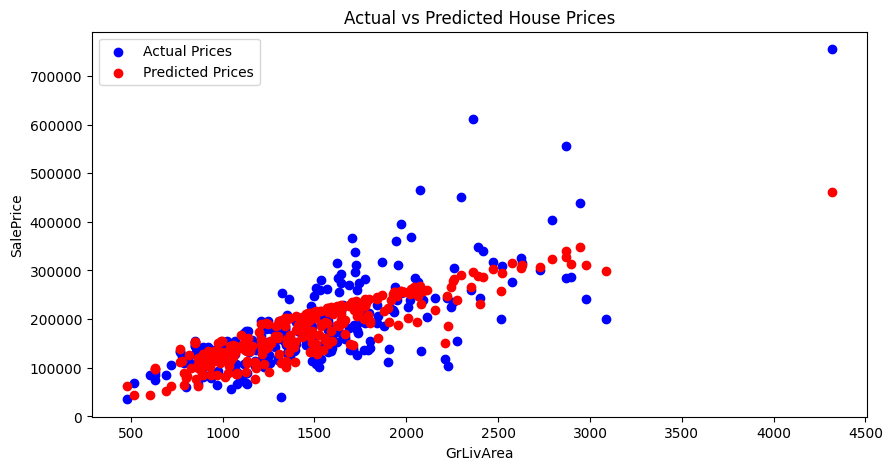

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = "train.csv"
df = pd.read_csv(file_path)

# Select relevant columns
selected_features = ["GrLivArea", "YearBuilt", "SalePrice"]
df_selected = df[selected_features]

# Split the data into training and testing sets
X = df_selected[["GrLivArea", "YearBuilt"]]
y = df_selected["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualization
plt.figure(figsize=(10, 5))
plt.scatter(X_test["GrLivArea"], y_test, color="blue", label="Actual Prices")
plt.scatter(X_test["GrLivArea"], y_pred, color="red", label="Predicted Prices")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()


#**Problem 3**: Comparison of methods

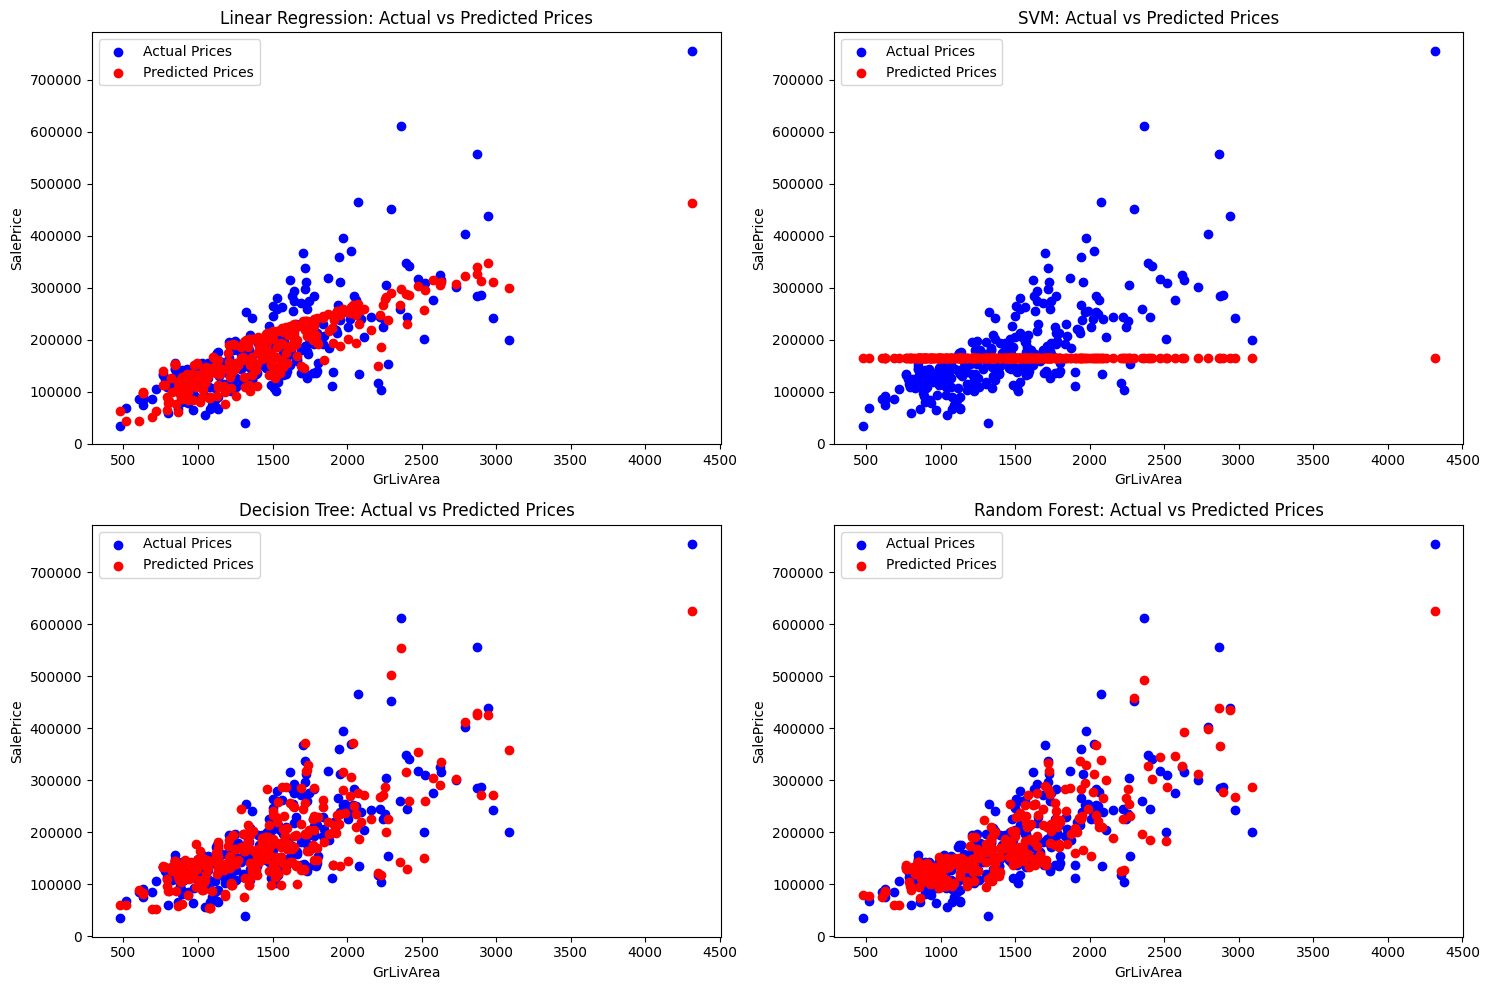

               Model  Mean Squared Error
0  Linear Regression        2.495555e+09
1                SVM        7.844111e+09
2      Decision Tree        2.303138e+09
3      Random Forest        1.550227e+09


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = "train.csv"
df = pd.read_csv(file_path)

# Select relevant columns
selected_features = ["GrLivArea", "YearBuilt", "SalePrice"]
df_selected = df[selected_features]

# Split the data into training and testing sets
X = df_selected[["GrLivArea", "YearBuilt"]]
y = df_selected["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "SVM": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Train, predict, and evaluate models
results = {}
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

    # Visualization
    plt.subplot(2, 2, i)
    plt.scatter(X_test["GrLivArea"], y_test, color="blue", label="Actual Prices")
    plt.scatter(X_test["GrLivArea"], y_pred, color="red", label="Predicted Prices")
    plt.xlabel("GrLivArea")
    plt.ylabel("SalePrice")
    plt.title(f"{name}: Actual vs Predicted Prices")
    plt.legend()

plt.tight_layout()
plt.show()

# Display MSE results
results_df = pd.DataFrame(results.items(), columns=["Model", "Mean Squared Error"])
print(results_df)


#**Problem 4**: Learning using other features

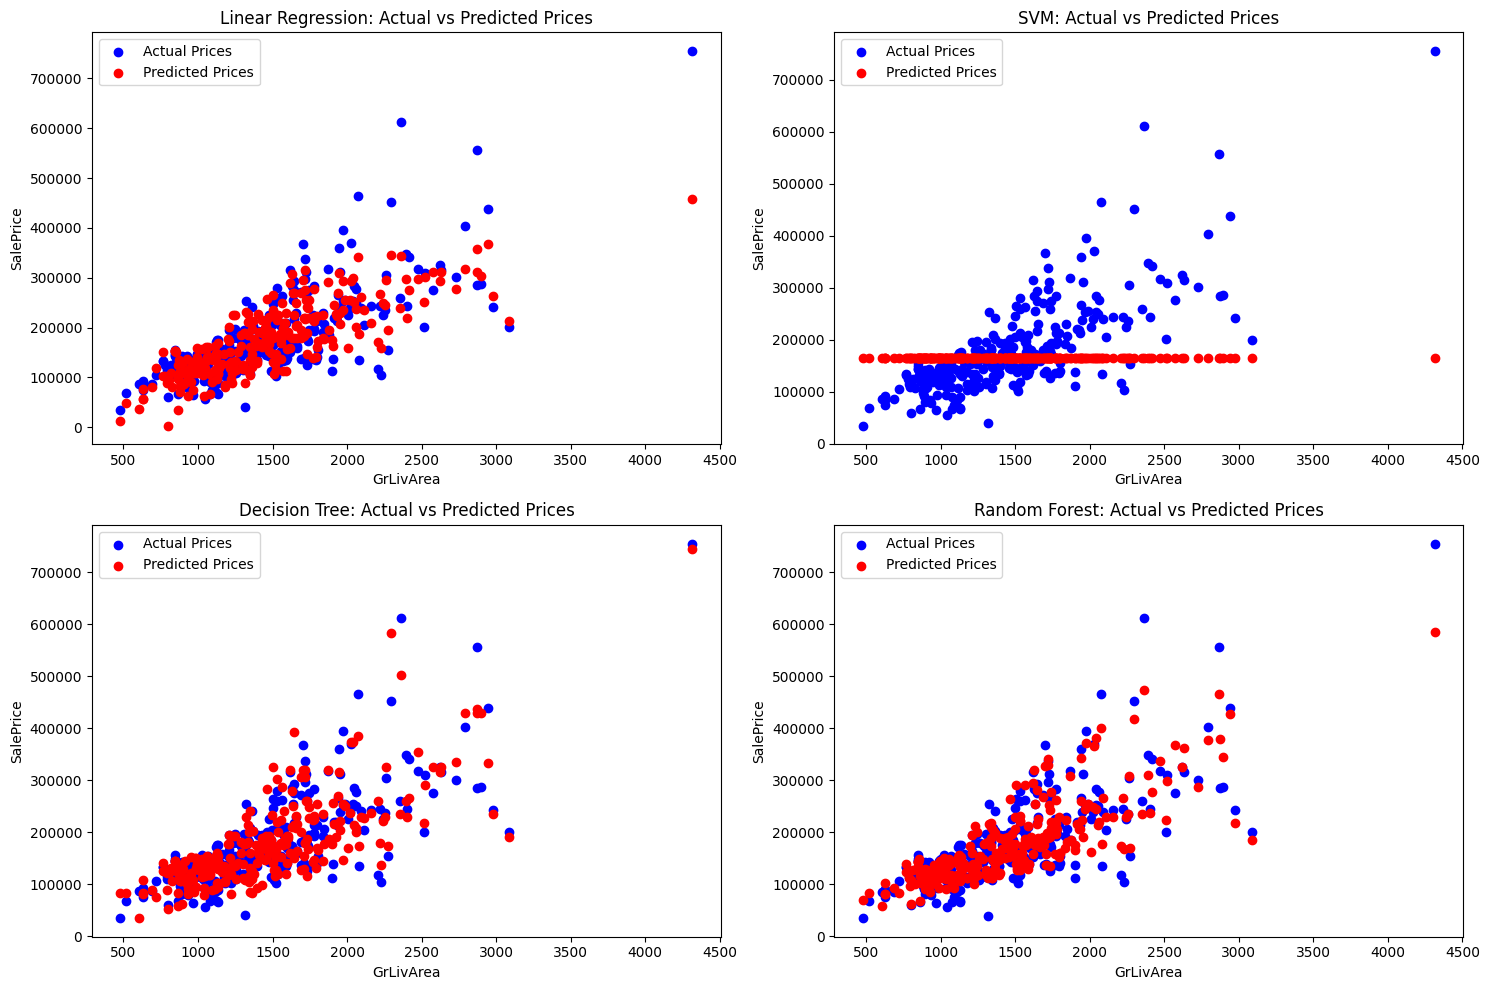

               Model  Mean Squared Error
0  Linear Regression        1.581120e+09
1                SVM        7.851191e+09
2      Decision Tree        1.655254e+09
3      Random Forest        8.925671e+08


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = "train.csv"
df = pd.read_csv(file_path)

# Select multiple features, including previously used ones
selected_features = ["GrLivArea", "YearBuilt", "OverallQual", "TotalBsmtSF", "GarageCars", "SalePrice"]
df_selected = df[selected_features].dropna()

# Split the data into training and testing sets
X = df_selected.drop(columns=["SalePrice"])
y = df_selected["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "SVM": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Train, predict, and evaluate models
results = {}
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

    # Visualization
    plt.subplot(2, 2, i)
    plt.scatter(X_test["GrLivArea"], y_test, color="blue", label="Actual Prices")
    plt.scatter(X_test["GrLivArea"], y_pred, color="red", label="Predicted Prices")
    plt.xlabel("GrLivArea")
    plt.ylabel("SalePrice")
    plt.title(f"{name}: Actual vs Predicted Prices")
    plt.legend()

plt.tight_layout()
plt.show()

# Display MSE results
results_df = pd.DataFrame(results.items(), columns=["Model", "Mean Squared Error"])
print(results_df)
